In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('nba_players_stats_20years.csv')
df.head()

,Unnamed: 0,SEASON,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,0,2003-04,977,1,Kobe Bryant,1610612747,LAL,22,973,190,...,104,121,42,7,61,59,539,451,1.98,0.69
1,1,2003-04,1888,2,Richard Hamilton,1610612765,DET,23,924,181,...,106,97,27,1,72,72,494,408,1.35,0.38
2,2,2003-04,406,3,Shaquille O'Neal,1610612747,LAL,22,917,182,...,291,55,7,61,55,90,473,562,1.00,0.13
3,3,2003-04,708,4,Kevin Garnett,1610612750,MIN,18,783,168,...,263,92,24,41,75,57,438,551,1.23,0.32
4,4,2003-04,1497,5,Chauncey Billups,1610612765,DET,23,881,110,...,70,136,31,2,60,57,378,366,2.27,0.52


In [3]:
df_nba_cleaned = df.drop(columns=['Unnamed: 0'])
df_nba_cleaned.head()

,SEASON,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2003-04,977,1,Kobe Bryant,1610612747,LAL,22,973,190,460,...,104,121,42,7,61,59,539,451,1.98,0.69
1,2003-04,1888,2,Richard Hamilton,1610612765,DET,23,924,181,405,...,106,97,27,1,72,72,494,408,1.35,0.38
2,2003-04,406,3,Shaquille O'Neal,1610612747,LAL,22,917,182,307,...,291,55,7,61,55,90,473,562,1.00,0.13
3,2003-04,708,4,Kevin Garnett,1610612750,MIN,18,783,168,372,...,263,92,24,41,75,57,438,551,1.23,0.32
4,2003-04,1497,5,Chauncey Billups,1610612765,DET,23,881,110,286,...,70,136,31,2,60,57,378,366,2.27,0.52


In [4]:
df_nba_cleaned.dtypes

SEASON        object
PLAYER_ID      int64
RANK           int64
PLAYER        object
TEAM_ID        int64
TEAM          object
GP             int64
MIN            int64
FGM            int64
FGA            int64
FG_PCT       float64
FG3M           int64
FG3A           int64
FG3_PCT      float64
FTM            int64
FTA            int64
FT_PCT       float64
OREB           int64
DREB           int64
REB            int64
AST            int64
STL            int64
BLK            int64
TOV            int64
PF             int64
PTS            int64
EFF            int64
AST_TOV      float64
STL_TOV      float64
dtype: object

In [5]:
#visão geral das estatísticas descritivas do dataframe
df_nba_cleaned.describe()

,PLAYER_ID,RANK,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
count,4.332000e+03,4332.000000,4.332000e+03,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,...,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000
mean,4.166438e+05,102.828947,1.610613e+09,8.412973,196.114958,29.634118,65.999077,0.412437,7.036704,20.032087,...,34.043860,16.743075,5.701985,3.913666,10.309095,17.673130,81.412973,90.411819,1.364965,0.575265
std,6.216285e+05,58.948624,8.494388e+00,5.818271,201.029026,37.484075,80.249392,0.179913,11.151495,29.600817,...,41.375545,25.940784,7.159822,6.574436,13.282303,17.087448,104.070829,112.436683,1.345264,0.665191
min,1.500000e+01,1.000000,1.610613e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,2.440000e+03,52.000000,1.610613e+09,4.000000,42.000000,4.000000,10.000000,0.349000,0.000000,1.000000,...,6.000000,2.000000,1.000000,0.000000,2.000000,4.000000,11.000000,13.000000,0.330000,0.000000
50%,2.015640e+05,103.000000,1.610613e+09,6.000000,138.000000,17.000000,39.000000,0.429000,2.000000,7.000000,...,20.000000,7.000000,3.000000,1.000000,6.000000,13.000000,47.000000,53.000000,1.130000,0.430000
75%,2.035260e+05,154.000000,1.610613e+09,12.000000,266.250000,39.000000,88.000000,0.500000,9.000000,27.000000,...,45.000000,20.000000,8.000000,5.000000,14.000000,25.000000,107.000000,118.000000,2.000000,0.800000
max,1.641816e+06,219.000000,1.610613e+09,26.000000,1079.000000,275.000000,544.000000,1.000000,98.000000,244.000000,...,353.000000,227.000000,51.000000,62.000000,100.000000,102.000000,748.000000,816.000000,17.000000,8.000000


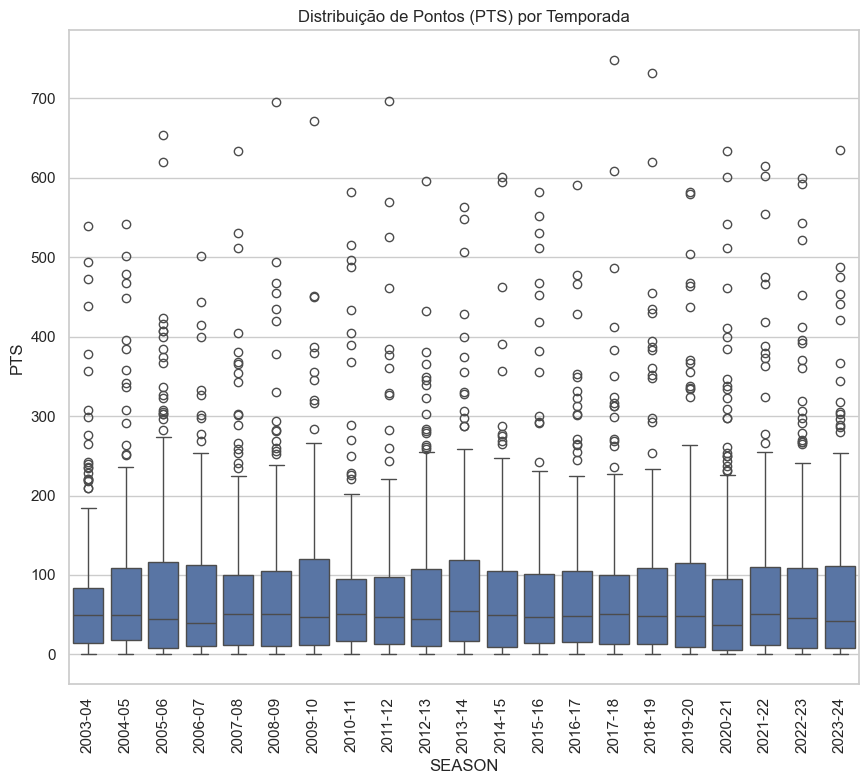

In [47]:
# Boxplots para Pontos, Rebotes e Assistências ao longo das temporadas
sns.set(style="whitegrid")
plt.figure(figsize=(25, 8))
# Gráfico 1: Distribuição de Pontos por Temporada
plt.subplot(1, 3, 1)
sns.boxplot(x='SEASON', y='PTS', data=df_nba_cleaned)
plt.title('Distribuição de Pontos (PTS) por Temporada')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


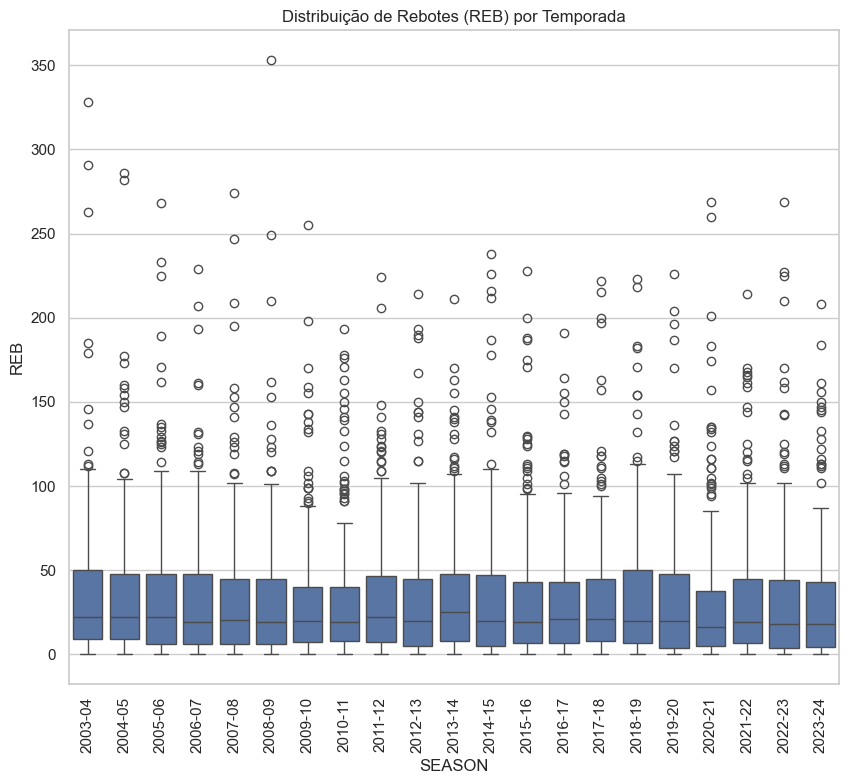

In [46]:
# Gráfico 2: Distribuição de Rebotes por Temporada
plt.figure(figsize=(25,8))
plt.subplot(1, 3, 2)
sns.boxplot(x='SEASON', y='REB', data=df_nba_cleaned)
plt.title('Distribuição de Rebotes (REB) por Temporada')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


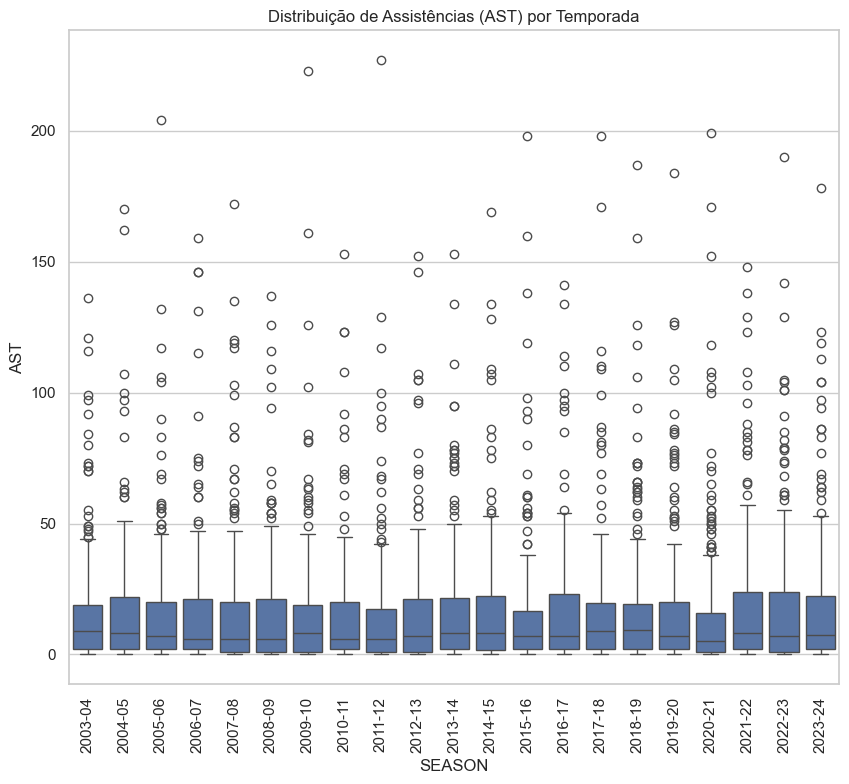

In [48]:
# Gráfico 3: Distribuição de Assistências por Temporada
plt.figure(figsize=(25,8))
plt.subplot(1, 3, 3)
sns.boxplot(x='SEASON', y='AST', data=df_nba_cleaned)
plt.title('Distribuição de Assistências (AST) por Temporada')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

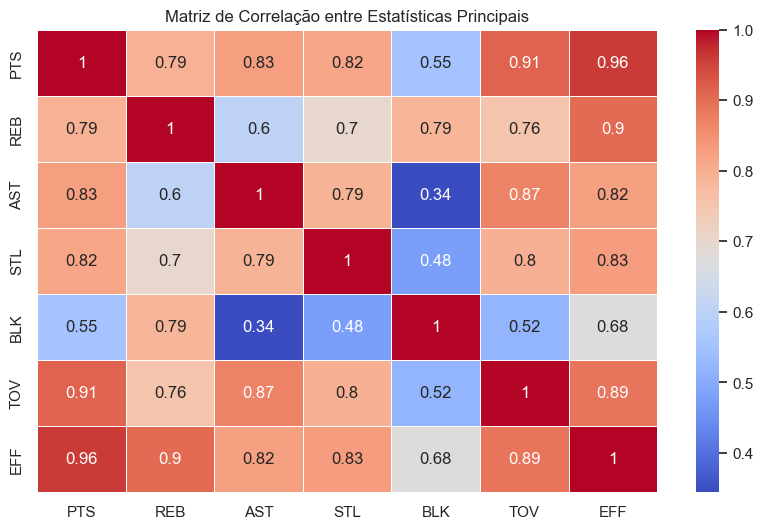

In [30]:
#Matriz de correlação entre estatísticas principais

# Selecionar colunas numéricas principais para análise
stats_columns = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'EFF']

# Cálculo da matriz de correlação
corr_matrix = df_nba_cleaned[stats_columns].corr()

# Exibir a matriz de correlação com um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Estatísticas Principais')
plt.show()

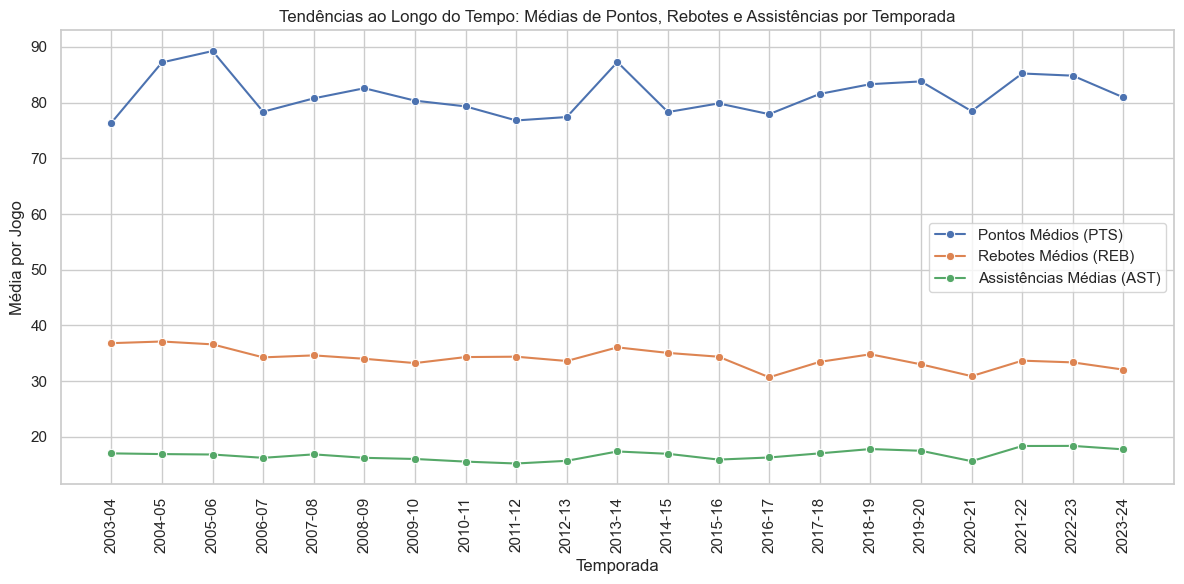

In [31]:
# Tendências ao longo do tempo: Médias de Pontos, Rebotes e Assistências por temporada
# Calculando a média de pontos, rebotes e assistências por temporada
mean_stats_per_season = df_nba_cleaned.groupby('SEASON')[['PTS', 'REB', 'AST']].mean().reset_index()

# Visualizando as tendências com um gráfico de linha
plt.figure(figsize=(12, 6))

# Gráfico para pontos
sns.lineplot(x='SEASON', y='PTS', data=mean_stats_per_season, label='Pontos Médios (PTS)', marker='o')

# Gráfico para rebotes
sns.lineplot(x='SEASON', y='REB', data=mean_stats_per_season, label='Rebotes Médios (REB)', marker='o')

# Gráfico para assistências
sns.lineplot(x='SEASON', y='AST', data=mean_stats_per_season, label='Assistências Médias (AST)', marker='o')

plt.title('Tendências ao Longo do Tempo: Médias de Pontos, Rebotes e Assistências por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Média por Jogo')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


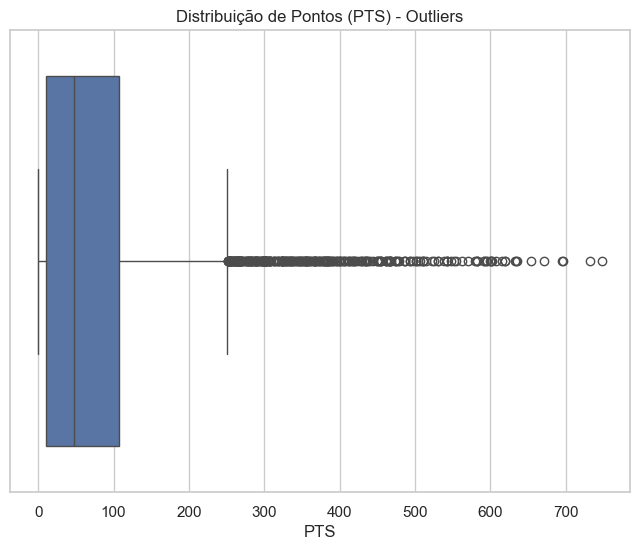

,PLAYER,PTS,TEAM,SEASON
0,Kobe Bryant,539,LAL,2003-04
1,Richard Hamilton,494,DET,2003-04
2,Shaquille O'Neal,473,LAL,2003-04
3,Kevin Garnett,438,MIN,2003-04
4,Chauncey Billups,378,DET,2003-04
...,...,...,...,...
4124,Pascal Siakam,367,IND,2023-24
4125,Nikola Jokić,344,DEN,2023-24
4126,Derrick White,318,BOS,2023-24
4127,Karl-Anthony Towns,305,MIN,2023-24


In [33]:
# Identificação de outliers

# Boxplot para identificar outliers na pontuação
plt.figure(figsize=(8, 6))
sns.boxplot(x='PTS', data=df_nba_cleaned)
plt.title('Distribuição de Pontos (PTS) - Outliers')
plt.show()

# Filtrando jogadores com pontos acima do percentil 95
high_scorers = df_nba_cleaned[df_nba_cleaned['PTS'] > df_nba_cleaned['PTS'].quantile(0.95)]
high_scorers[['PLAYER', 'PTS', 'TEAM', 'SEASON']]


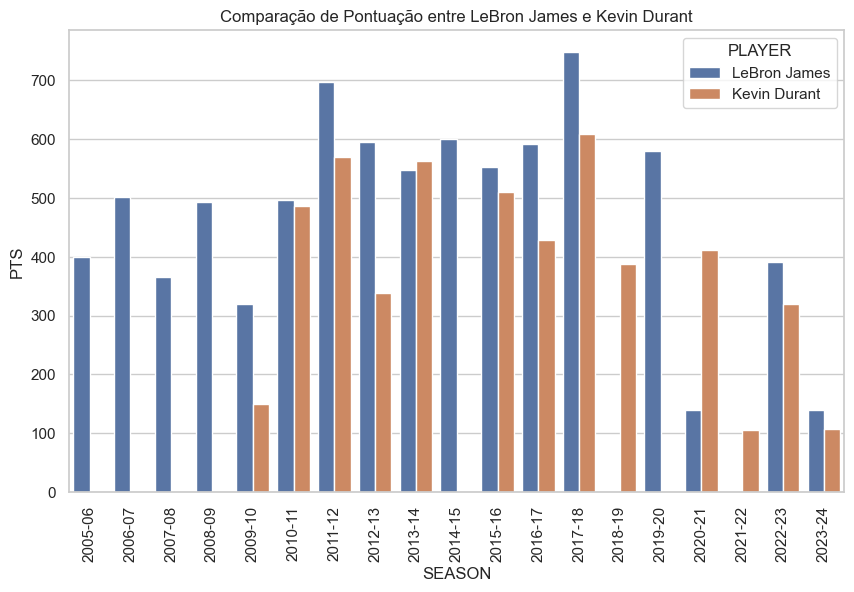

In [39]:
# Comparações entre jogadores e times específicos
# Comparação entre dois jogadores específicos
players_to_compare = df_nba_cleaned[df_nba_cleaned['PLAYER'].isin(['LeBron James', 'Kevin Durant'])]

# Visualizando a pontuação desses jogadores por temporada
plt.figure(figsize=(10, 6))
sns.barplot(x='SEASON', y='PTS', hue='PLAYER', data=players_to_compare)
plt.title('Comparação de Pontuação entre LeBron James e Kevin Durant')
plt.xticks(rotation=90)
plt.show()


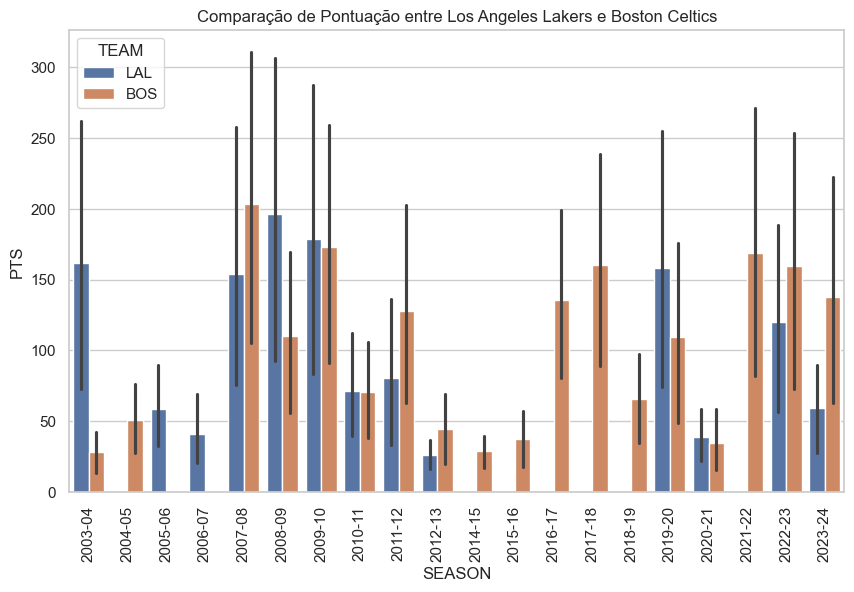

In [40]:
# Comparação de times específicos (usando pontos como exemplo)
teams_to_compare = df_nba_cleaned[df_nba_cleaned['TEAM'].isin(['LAL', 'BOS'])]

# Visualizando a pontuação média por time
plt.figure(figsize=(10, 6))
sns.barplot(x='SEASON', y='PTS', hue='TEAM', data=teams_to_compare)
plt.title('Comparação de Pontuação entre Los Angeles Lakers e Boston Celtics')
plt.xticks(rotation=90)
plt.show()
